# 多层感知机+代码实现

## 感知机

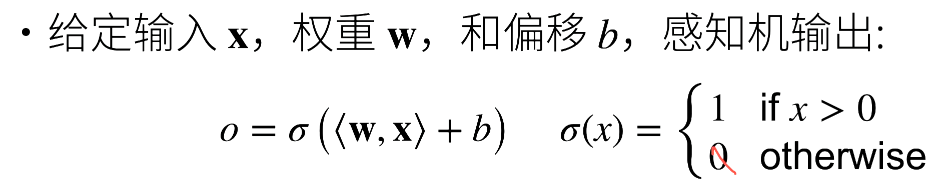

与softmax的区别：感知机回归输出实数，softmax回归输出标签类别

感知机的问题：感知机不能拟合XOR函数，它只能产生线性分割面。

总结
- 感知机是一个二分类模型，是最早的AI模型之一
- 它的求解算法等价于使用批量大小为1的梯度下降法
- 它不能拟合XOR函数，导致第一次的AI寒冬

## 多层感知机

总结
- 多层感知机使用隐藏层和激活函数来得到非线性模型
- 常用激活函数是Sigmoid，Tanh，ReLU
- 使用Softmax来处理多分类
- 超参数为隐藏层数和各个隐藏层的大小

## 多层感知机的代码实现

In [1]:
# 导入第三方库
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
#加载训练迭代器和测试迭代器
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
#定义模型参数
num_inputs, num_outputs, num_hiddens = 28*28, 10, 256
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad= True)* 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad= True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad= True)* 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad= True))

params = [W1, b1, W2, b2]

In [4]:
#定义激活函数
def ReLU(X):
    """定义ReLU函数，使用torch.zeros_like()方法创建跟x形状一样的0元素张量"""
    a = torch.zeros_like(X)
    return torch.max(X, a)

#定义模型网络
def net(X):
    #-1是一个占位符，表示自动计算长度,将二维图像转换为一维向量
    X = X.reshape((-1, num_inputs))
    #@代表矩阵乘法
    H = ReLU(X@W1 + b1)
    return (H@W2 + b2)

In [5]:
#定义损失函数
loss = nn.CrossEntropyLoss(reduction='none')

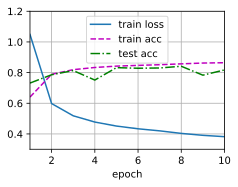

In [6]:
#进行模型训练
num_epochs, lr = 10, 0.1
#使用随机小批量梯度下降法进行参数优化
updater = torch.optim.SGD(params, lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

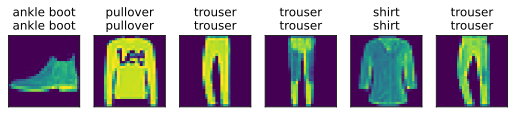

In [7]:
#展示预测结果
d2l.predict_ch3(net, test_iter)

## 多层感知机的简洁实现

In [8]:
#与softmax回归的简洁实现相比，唯一的区别是添加了2个全连接层
#第一层是隐藏层，包含256个隐藏单元，并使用了ReLU激活函数
#第二层是输出层
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    """初始化参数"""
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std= 0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

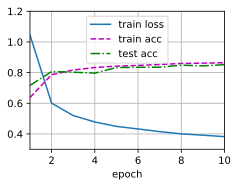

In [9]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)